In [1]:
import networkx as nx
from languageGraphUtils import save_lg, read_lg
import time
import matplotlib.pyplot as plt

# Load language graph and synonyms graph

In [2]:
english_word_graph = read_lg('graphs/OANC-GrAF.lg')

In [3]:
synonyms = nx.read_gml('graphs/synonyms.gml')

In [4]:
dictionary = list(english_word_graph.nodes)

In [5]:
thesaurus = list(synonyms.nodes)

# Remove unwanted words (apply count threshold)

In [6]:
COUNT_THRESHOLD = 5


for w in dictionary:
    count = english_word_graph.node[w]['attr_dict']['count']
    
    if (count < COUNT_THRESHOLD):
        english_word_graph.remove_node(w)


# Add synonym edges from thesaurus

In [7]:
#Add synonym edges from synonym graph

words = list(english_word_graph.nodes)

for edge in synonyms.edges:
    w1 = edge[0]
    w2 = edge[1]
    
    if (w1 in words and w2 in words):
        english_word_graph.add_edge(w1, w2, key="synonym")

# Save graph and print size

In [8]:
save_lg(english_word_graph, "graphs/english_word_graph.lg")

In [9]:
print("n:", len(english_word_graph.nodes))
print("m:", len(english_word_graph.edges))

n: 59025
m: 17941164


# Find synonym distribution to calculate generic word threshold

In [16]:
import random

k = 1000
sampled_nodes = random.sample(english_word_graph.nodes, k)

synonym_counts = []

for i, w in enumerate(sampled_nodes):
    print(i)
    synonym_counts.append(len([s for s in english_word_graph.edges(w, keys=True) if s[2] == "synonym"]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Mean: 6.727
Stdev 14.450788777651422


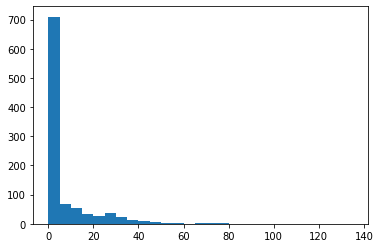

In [18]:
import matplotlib.pyplot as plt
import statistics as s

plt.hist(synonym_counts, bins=range(0, 140, 5))

x_bar = s.mean(synonym_counts)
std = s.stdev(synonym_counts, x_bar)

print("Mean:", x_bar)
print("Stdev", std)

# View example generic words

In [27]:
num_found = 0

for w in sampled_nodes:
    synonym_count = len([s for s in english_word_graph.edges(w, keys=True) if s[2] == "synonym"])
    if (synonym_count > 65):
        num_found += 1
        print(w, synonym_count)

print(num_found)

destroy 71
business 76
carry 74
wrong 79
disposition 95
crush 108
extend 69
opening 89
hide 68
make 134
promote 103
energy 69
try 72
good 78
14


# Generate small sample of language graph for testing

In [ ]:
k = 5000
sampled_nodes = random.sample(english_word_graph.nodes, k)

sample = english_word_graph.subgraph(sampled_nodes)

print("Saving graph...")
save_lg(sample, "graphs/sample.lg")

Saving graph...
